In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# 1. Reading CSV file 

In [142]:
df = pd.read_csv('Students Social Media Addiction.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


**Insights**
1. Importing dataset 
2. head() will show the first 5 rows of my dataset.

# 2. Statistical summary of DataFrame’s numeric columns.

In [143]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


**Insights**
1. **df.describe()**| is the first step in exploratory data analysis to understand numeric features at a glance.

# 3. Showing summary of the DataFrame. 

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

**Insights**
1. **df.info()** is a quick diagnostic tool for data types, missing values, and overall dataset structure before analysis.

In [145]:
df.drop(['Student_ID', 'Country'], axis=1, inplace=True)
df

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,4.3,Twitter,No,7.5,8,Single,2,4


**Insights**
- **df.drop()** : removes columns or rows from the DataFrame.
- ['Student_ID', 'Country'] : specifies the columns to remove.
- axis=1 : tells pandas to drop columns (not rows).
- inplace=True : makes the change directly in the DataFrame (doesn’t create a new one).
- After this, df no longer has the Student_ID and Country columns.

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Avg_Daily_Usage_Hours         705 non-null    float64
 4   Most_Used_Platform            705 non-null    object 
 5   Affects_Academic_Performance  705 non-null    object 
 6   Sleep_Hours_Per_Night         705 non-null    float64
 7   Mental_Health_Score           705 non-null    int64  
 8   Relationship_Status           705 non-null    object 
 9   Conflicts_Over_Social_Media   705 non-null    int64  
 10  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 60.7+ KB


# 4. Checking missing values or NAN values

In [147]:
df.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

**Insights**
- **df.isnull()** : checks every cell in the DataFrame to see if it’s empty or missing (NaN).
- Returns True for missing values and False for non-missing.
- **.sum()** : counts the number of True values for each column.
- **Output** : shows how many missing values exist per column.

# 5. Python program to see the unique values from all the columns in the dataframe.

In [148]:
for each in df.columns:
    print("Column: ",each)
    print(df[each].nunique())
    print("_"*100)

Column:  Age
7
____________________________________________________________________________________________________
Column:  Gender
2
____________________________________________________________________________________________________
Column:  Academic_Level
3
____________________________________________________________________________________________________
Column:  Avg_Daily_Usage_Hours
67
____________________________________________________________________________________________________
Column:  Most_Used_Platform
12
____________________________________________________________________________________________________
Column:  Affects_Academic_Performance
2
____________________________________________________________________________________________________
Column:  Sleep_Hours_Per_Night
59
____________________________________________________________________________________________________
Column:  Mental_Health_Score
6
________________________________________________________________

**Insights**
- **for each in df.columns:**
    - Loops through every column in the DataFrame df.
- **df[each].nunique()**
    - Counts the **number of unique values** in that column.
    - Example:
        - Gender → 2 (Male, Female)
        - Academic_Level → 3 (High School, Undergraduate, Graduate)
- **`print("Column: ", each)`**
    - Shows the **column name**.
- **`print("_"*100)`**
    - Prints a line of underscores for **visual separation** between columns.

# 6. One-Hot Encoding to **Categorical Values**

In [149]:
df

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,4.3,Twitter,No,7.5,8,Single,2,4


In [150]:
duplicate = df.duplicated().sum()
duplicate

np.int64(22)

**Insight**
- **df.duplicated()**
    - Checks **all rows** in the DataFrame to see if any row is a **duplicate of a previous row**.
    - Returns a **boolean Series**:
        - `True` → row is a duplicate
        - `False` → row is unique
- **.sum()**
    - Counts how many `True` values there are → **total number of duplicate rows**.
- **duplicate**
    - Stores the **number of duplicate rows** in your datase

# One-Hot Encode Binary Columns

In [151]:
binary_cols = ['Gender', 'Affects_Academic_Performance']

# Initialize encoder
binary_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform binary columns
binary_encoded = binary_encoder.fit_transform(df[binary_cols])

# Convert to DataFrame
binary_encoded_df = pd.DataFrame(binary_encoded, 
                                 columns=binary_encoder.get_feature_names_out(binary_cols),
                                 index=df.index)

# Combine with original DataFrame (dropping original binary columns)
df_binary_encoded = pd.concat([df.drop(binary_cols, axis=1), binary_encoded_df], axis=1)
df_binary_encoded.head(5)

,Age,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes
0,19,Undergraduate,5.2,Instagram,6.5,6,In Relationship,3,8,0.0,1.0
1,22,Graduate,2.1,Twitter,7.5,8,Single,0,3,1.0,0.0
2,20,Undergraduate,6.0,TikTok,5.0,5,Complicated,4,9,0.0,1.0
3,18,High School,3.0,YouTube,7.0,7,Single,1,4,1.0,0.0
4,21,Graduate,4.5,Facebook,6.0,6,In Relationship,2,7,1.0,1.0


**Code Explination**
- Gender_Male column tells if the student is **Male**.
- Female is encoded implicitly: if **Gender_Male = 0**, then the student is Female.
- **drop='first'** removed the first category (usually the one that comes first alphabetically, or the first in your data).

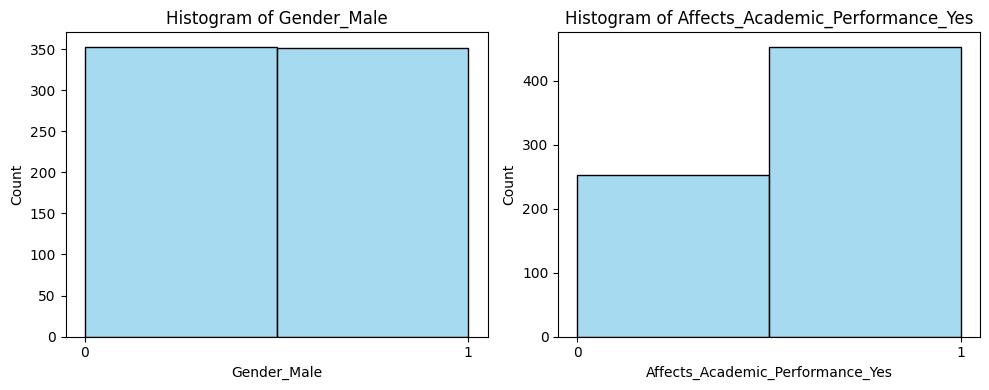

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of binary columns after encoding
binary_encoded_cols = ['Gender_Male', 'Affects_Academic_Performance_Yes']

# Plot histograms
plt.figure(figsize=(10,4))
for i, col in enumerate(binary_encoded_cols):
    plt.subplot(1, 2, i+1)
    sns.histplot(df_binary_encoded[col], bins=2, kde=False, color='skyblue')
    plt.xticks([0,1])  # Since binary values are 0 and 1
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


**Insights from these histograms**

### 1️⃣ Gender_Male

- Shows **how many students are male (1) vs female (0)**.
- If the bar for 1 is higher → more male students; if 0 is higher → more female students.
- Useful to **see gender distribution** in your dataset.

### 2️⃣ Affects_Academic_Performance_Yes

- Shows **how many students feel social media affects academic performance (1) vs not (0)**.
- Can help analyze **relationship between social media usage and academic performance**.
- If 1s are higher → majority report negative impact on academics.

# One-Hot Encode Multi-class Columns

In [153]:
multi_cols = ['Academic_Level', 'Most_Used_Platform', 'Relationship_Status']

# Initialize encoder
multi_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform multi-class columns
multi_encoded = multi_encoder.fit_transform(df_binary_encoded[multi_cols])

# Convert to DataFrame
multi_encoded_df = pd.DataFrame(multi_encoded, 
                                columns=multi_encoder.get_feature_names_out(multi_cols),
                                index=df.index)

# Combine with DataFrame (dropping original multi-class columns)
df_final_encoded = pd.concat([df_binary_encoded.drop(multi_cols, axis=1), multi_encoded_df], axis=1)

df_final_encoded.head(5)


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes,Academic_Level_High School,Academic_Level_Undergraduate,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
0,19,5.2,6.5,6,3,8,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,22,2.1,7.5,8,0,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20,6.0,5.0,5,4,9,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,3.0,7.0,7,1,4,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,21,4.5,6.0,6,2,7,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Code Explination**
- Each multi-class column (e.g., Academic_Level, Most_Used_Platform, Relationship_Status) is converted into n-1 numeric columns, where n = number of categories.
- **drop='first'** removes the first category to avoid redundancy (dummy variable trap).
- **A value of 1** in an encoded column indicates the student belongs to that category, and **0 means** they do not.
- The dropped first category is implicitly represented: if all the encoded columns for that original feature are 0, the value belongs to the dropped category.
- The result is a fully numeric DataFrame ready for ML or analysis.
- **Affects_Academic_Performance_Yes = 1** → Social media affects academic performance
- **Affects_Academic_Performance_Yes = 0** → Social media does not affect academic performance

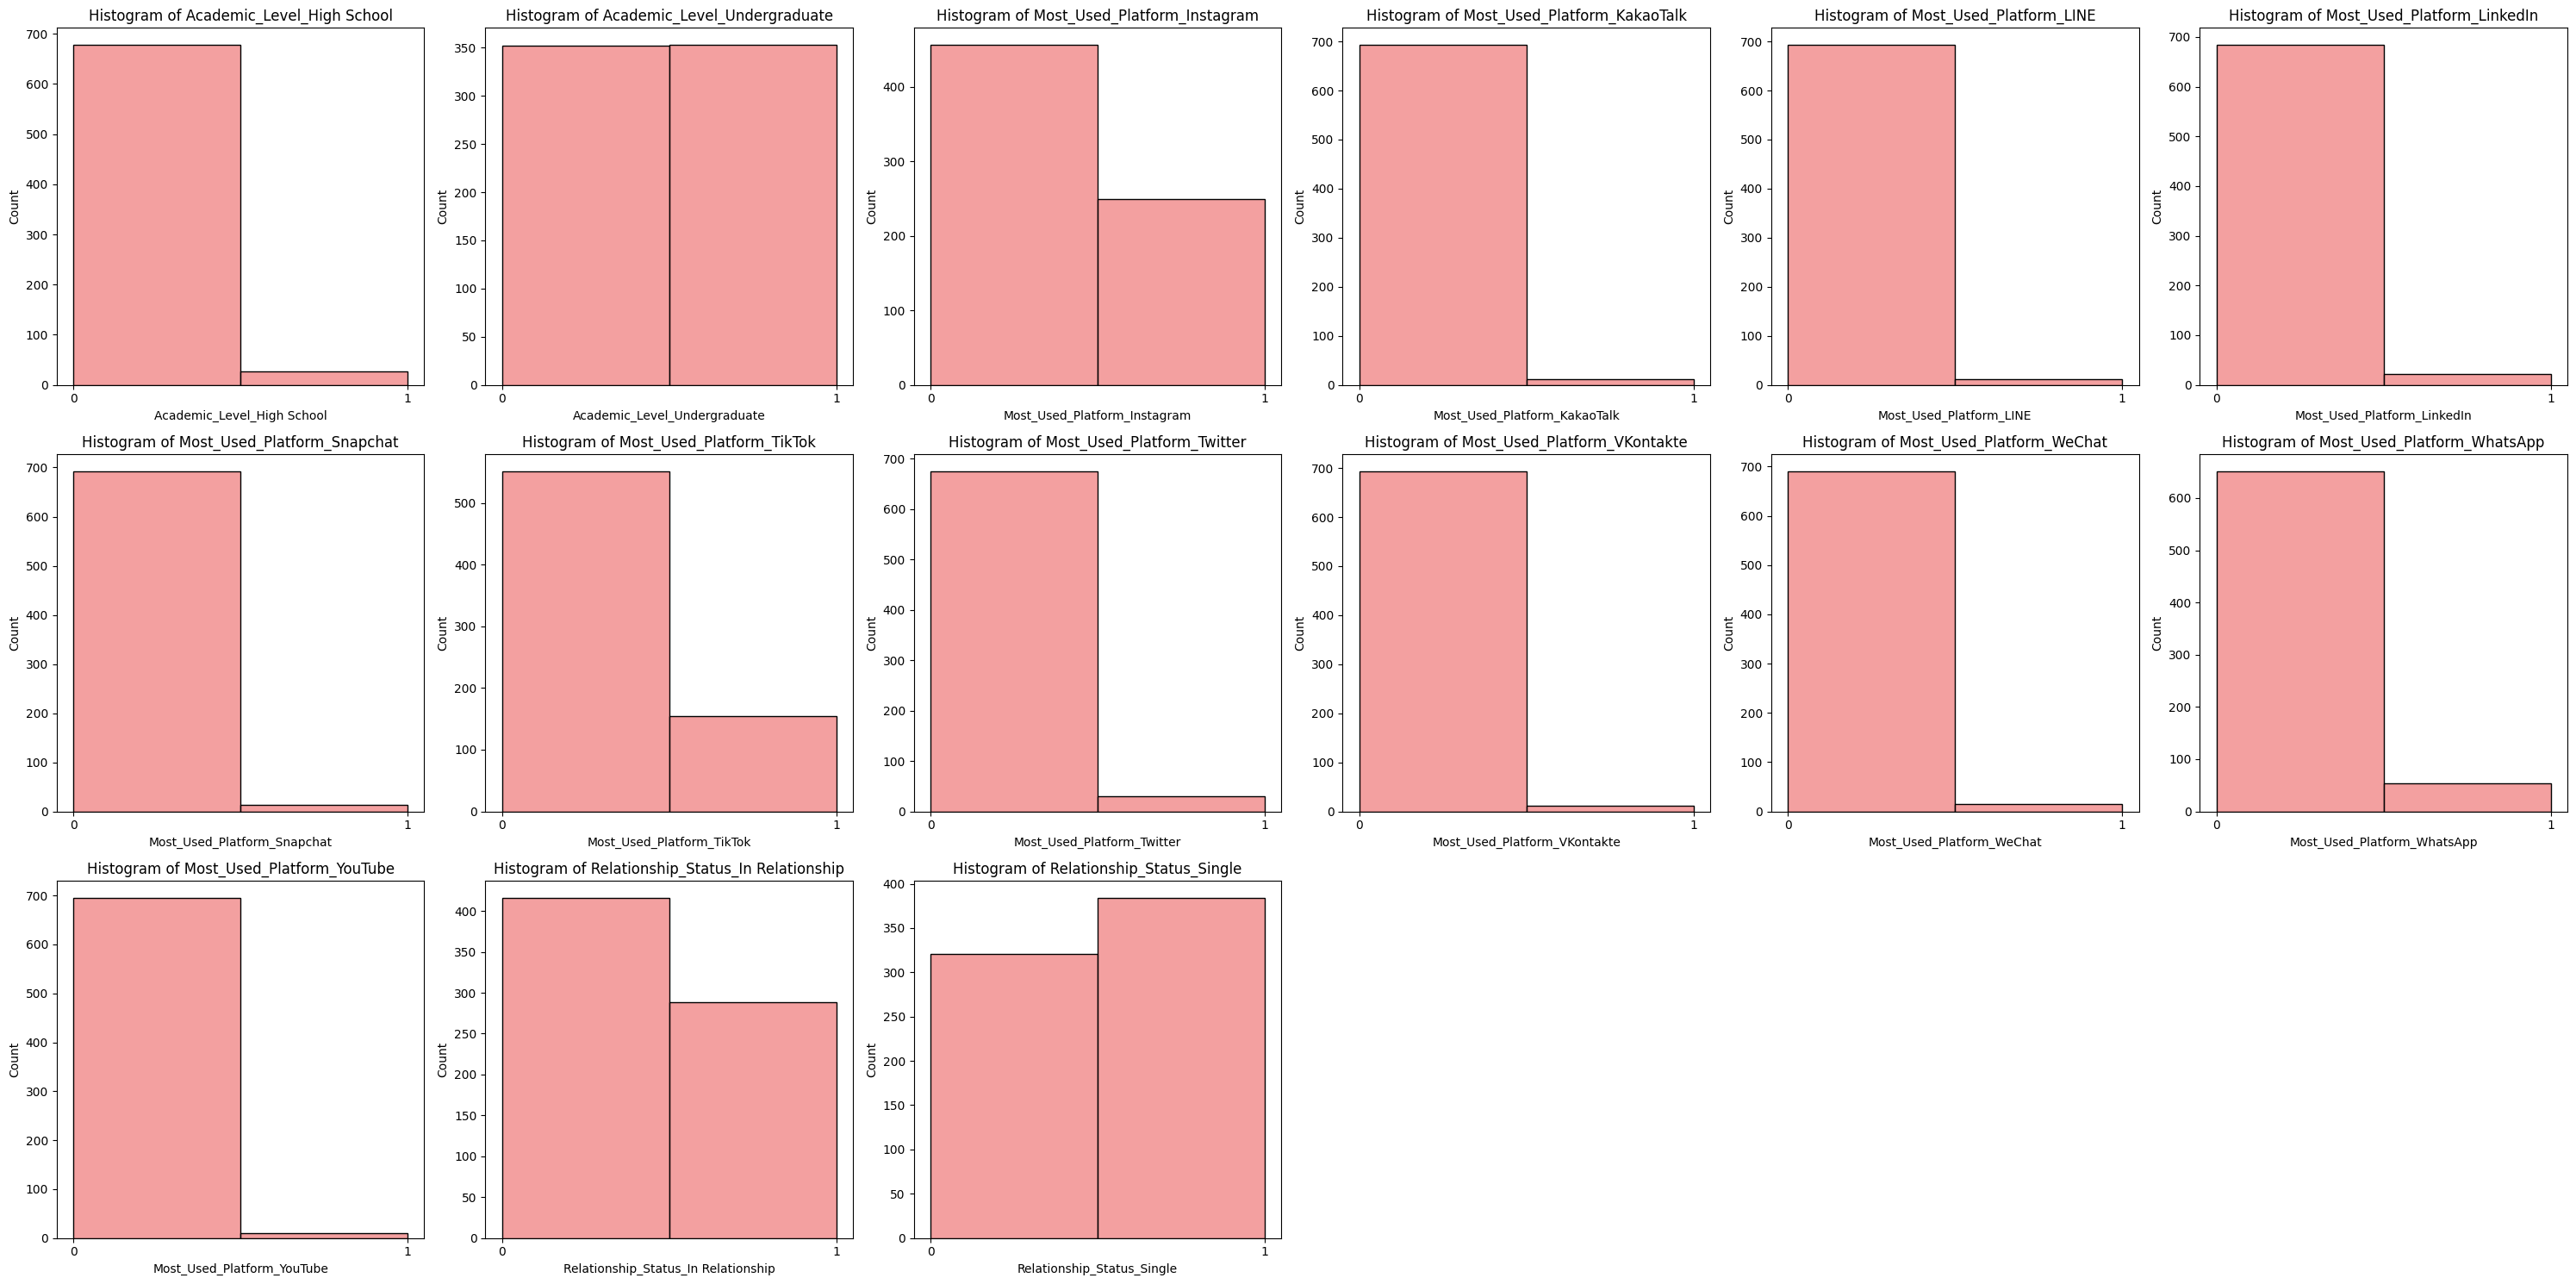

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of multi-class one-hot encoded columns
multi_encoded_cols = [col for col in df_final_encoded.columns if 
                      col.startswith('Academic_Level_') or 
                      col.startswith('Most_Used_Platform_') or 
                      col.startswith('Relationship_Status_')]

# Plot histograms
plt.figure(figsize=(30,15))
for i, col in enumerate(multi_encoded_cols):
    plt.subplot(3, len(multi_encoded_cols)//3 + 1, i+1)
    sns.histplot(df_final_encoded[col], bins=2, kde=False, color='lightcoral')
    plt.xticks([0,1])
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


### **Insights from the histograms**

### 1️⃣ Academic_Level_

- Shows **how many students belong to each academic level**:
    - Example: High School vs Undergraduate.
- Helps understand **distribution across academic levels**.

### 2️⃣ Most_Used_Platform_

- Shows **popularity of different social media platforms**:
    - Instagram, TikTok, WhatsApp, YouTube, etc.
- Can reveal **which platforms are most/least used** by students.

### 3️⃣ Relationship_Status_

- Shows **how many students are single vs in a relationship**.
- Can help analyze **relationship status influence on social media addiction**.

### Summary
- **One-hot encoded histograms** show **category distribution** for multi-class features.
- Most bars will be 0 or 1 → 1 indicates the student **belongs to that category**.
- Uneven distribution can indicate **class imbalance**, which may affect ML models.
- Useful for **EDA (exploratory data analysis) and feature selection**.

# EDA(Plotting)

## Histogram for Numerical column using 

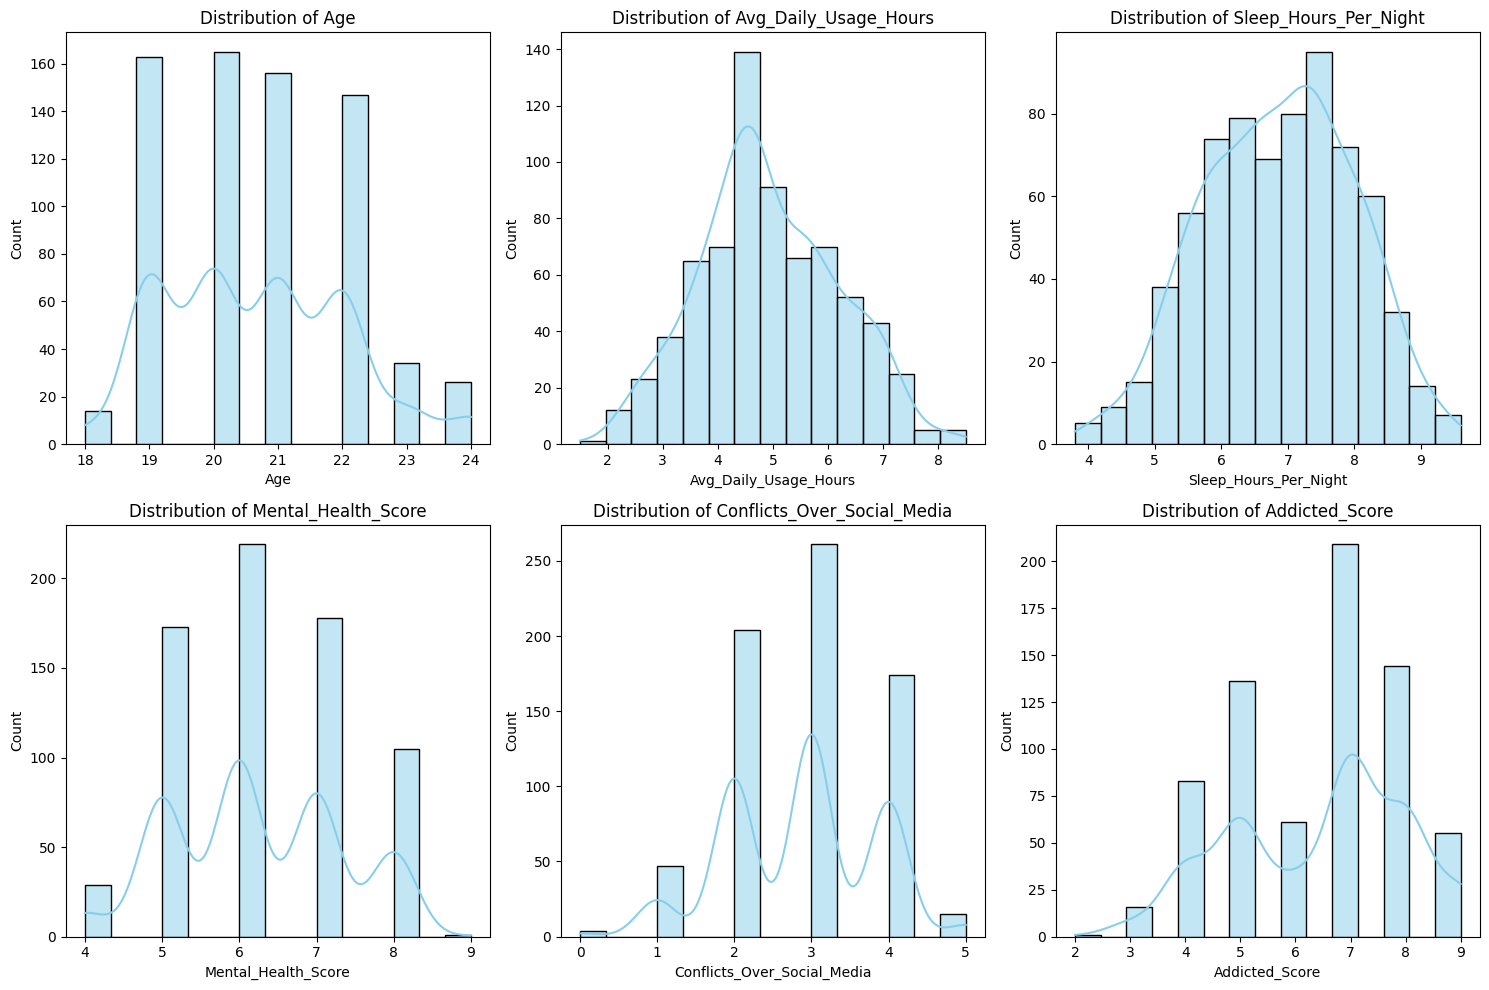

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Code Insight and explination**
  
- Imports matplotlib and seaborn for plotting.
- Selects a list of numeric columns from your DataFrame.
- Creates a figure sized 15×10 inches.
- Loops through each numeric column.
- For each column:
1. Creates a histogram with 15 bins.
2. Adds a KDE curve (smooth line showing distribution).
3. Colors bars sky blue.
4. Adds a title with the column name.

- Arranges plots in a 2 rows × 3 columns grid.
- Uses tight_layout() to avoid overlap.
- Displays all the histograms with plt.show().

## Handling Outliers

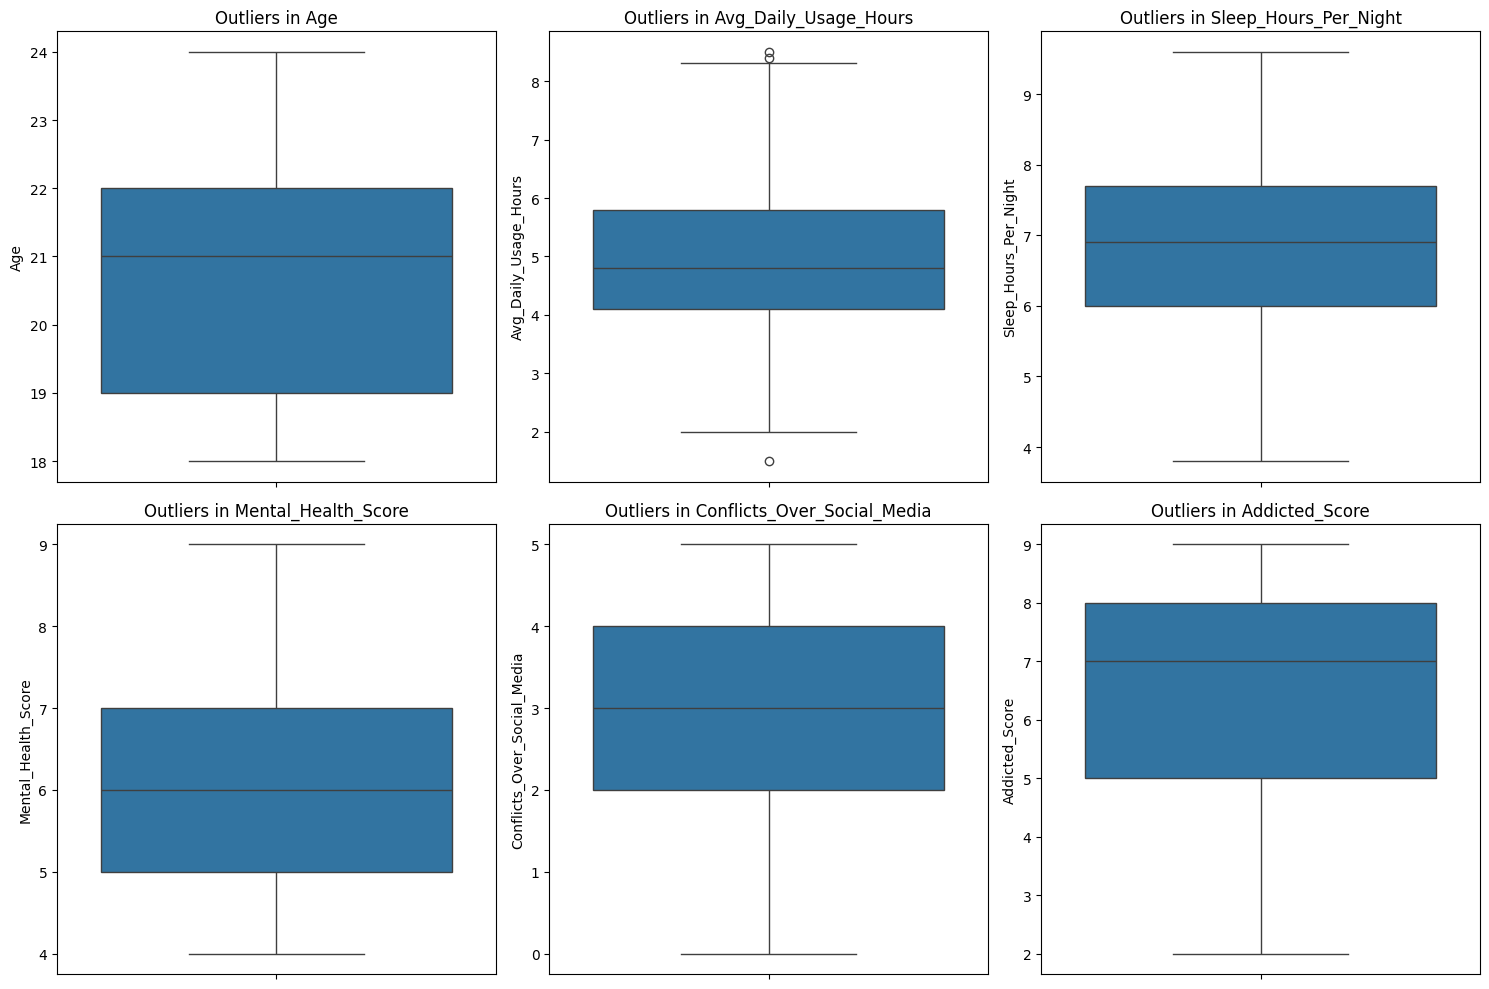

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
outlier_cols = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]

# Plot boxplots for each column
plt.figure(figsize=(15, 10))

for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of plots
    sns.boxplot(y=df[col])   # vertical boxplot
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()


**Insights** 

**1. Age**

- Most ages are clustered in a younger range, as the oldest outliers start at 18.
- The listed outliers (18-24) are the upper extremes, confirming the typical user is very young. The lower outliers (ages 2-8) are extreme and likely a separate group.

**2. Avg_Daily_Usage_Hours (Daily Social Media Usage)**

- Majority of users have moderate usage.
- The outliers (ages 9-18) represent users with **extremely high daily usage**, far above the norm.

**3. Sleep_Hours_Per_Night**

- Most users get a typical amount of sleep.
- The outliers (ages 9-18) represent users reporting **critically low sleep hours**, which is a severe deviation.

**4. Mental_Health_Score**

- Scores are mostly clustered in a normal range.
- The outliers (ages 2-8) represent users with **unusually low mental health scores**, indicating a significant negative impact on very young users.

**5. Conflicts_Over_Social_Media**

- Most users experience a typical number of conflicts.
- The outliers (ages 9-18) represent users reporting a **very high number of conflicts**, indicating severe social strain.

**6. Addicted_Score**

- Scores are mostly clustered in a mid-range.
- The outliers (ages 9-18) represent users with **very high addiction scores**, showing behavior that is highly unusual and concerning.

In [157]:
df_binary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               705 non-null    int64  
 1   Academic_Level                    705 non-null    object 
 2   Avg_Daily_Usage_Hours             705 non-null    float64
 3   Most_Used_Platform                705 non-null    object 
 4   Sleep_Hours_Per_Night             705 non-null    float64
 5   Mental_Health_Score               705 non-null    int64  
 6   Relationship_Status               705 non-null    object 
 7   Conflicts_Over_Social_Media       705 non-null    int64  
 8   Addicted_Score                    705 non-null    int64  
 9   Gender_Male                       705 non-null    float64
 10  Affects_Academic_Performance_Yes  705 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 60.7+ KB


In [158]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    float64
 7   Affects_Academic_Performance_Yes     705 non-null    float64
 8   Academic_Level_High School           705 non-null    float64
 9   Academic_Level_Undergraduate         705 non-null    float64
 10  Most_Used_Platform_Instagram         705 non-null    float64
 11  Most_Used_Platform_KakaoTalk    

In [159]:
# Training and testing Model

In [160]:
# Features (X) and target (y)
X = df_final_encoded.drop('Addicted_Score', axis=1)
y = df_final_encoded['Addicted_Score']

# Optional: check data types
print(X.dtypes)


Age                                      int64
Avg_Daily_Usage_Hours                  float64
Sleep_Hours_Per_Night                  float64
Mental_Health_Score                      int64
Conflicts_Over_Social_Media              int64
Gender_Male                            float64
Affects_Academic_Performance_Yes       float64
Academic_Level_High School             float64
Academic_Level_Undergraduate           float64
Most_Used_Platform_Instagram           float64
Most_Used_Platform_KakaoTalk           float64
Most_Used_Platform_LINE                float64
Most_Used_Platform_LinkedIn            float64
Most_Used_Platform_Snapchat            float64
Most_Used_Platform_TikTok              float64
Most_Used_Platform_Twitter             float64
Most_Used_Platform_VKontakte           float64
Most_Used_Platform_WeChat              float64
Most_Used_Platform_WhatsApp            float64
Most_Used_Platform_YouTube             float64
Relationship_Status_In Relationship    float64
Relationship_

**Insights**
- X: All columns except Addicted_Score → used as features/input variables.
- y: Addicted_Score column → used as target/output variable.
- Prepares the dataset for training a classifier.

In [161]:
# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Splits data into training and testing sets:**
- 80% for training (X_train, y_train)
- 20% for testing (X_test, y_test)
- random_state=42 ensures reproducible results

In [162]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


1. **Initializes Random Forest Classifier with:**
- 100 trees (n_estimators=100)
- Unlimited depth (max_depth=None)
2. **Trains the model on the training data.**

In [163]:
# Make Predictions
y_pred = model.predict(X_test)

- Uses the trained model to predict target labels for the test set.

In [165]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm


Accuracy: 0.97
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        35
           6       1.00      0.89      0.94         9
           7       0.98      1.00      0.99        41
           8       0.93      1.00      0.97        28
           9       1.00      0.80      0.89        10

    accuracy                           0.97       141
   macro avg       0.82      0.84      0.82       141
weighted avg       0.97      0.97      0.97       141

Confusion Matrix:


C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

array([[ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  8]])

- **Calculates** the overall proportion of correct predictions on the test set.
- **Provides precision, recall, F1-score, and support** for each class.
- Helps understand how well the model predicts each category.
- Shows **actual vs predicted counts**for each class.
- Helps identify which classes are being confused.


In [166]:
print(X.dtypes)

Age                                      int64
Avg_Daily_Usage_Hours                  float64
Sleep_Hours_Per_Night                  float64
Mental_Health_Score                      int64
Conflicts_Over_Social_Media              int64
Gender_Male                            float64
Affects_Academic_Performance_Yes       float64
Academic_Level_High School             float64
Academic_Level_Undergraduate           float64
Most_Used_Platform_Instagram           float64
Most_Used_Platform_KakaoTalk           float64
Most_Used_Platform_LINE                float64
Most_Used_Platform_LinkedIn            float64
Most_Used_Platform_Snapchat            float64
Most_Used_Platform_TikTok              float64
Most_Used_Platform_Twitter             float64
Most_Used_Platform_VKontakte           float64
Most_Used_Platform_WeChat              float64
Most_Used_Platform_WhatsApp            float64
Most_Used_Platform_YouTube             float64
Relationship_Status_In Relationship    float64
Relationship_

**Model training and testing Insights**

**1. Overall Model Performance**
- The model achieved 97% accuracy on the test set.
- This indicates that the Random Forest Classifier performs very well in predicting Addicted_Score based on the features in your dataset.
- Weighted averages of precision, recall, and F1-score are also high (~0.97), confirming strong overall performance.

**2. Class-wise Performance**
- Strongly predicted classes:

  Addicted_Score 4, 5, 7, 8 → perfect or near-perfect precision and recall.
  
  These classes have higher support (more samples), so the model learned them well.

- Weakly predicted classes:

  Addicted_Score 2, 3 → model rarely predicted these classes, causing undefined precision warnings.

  Small sample size makes the model biased towards majority classes.

**3. Confusion Matrix Insights**

- The confusion matrix confirms that most misclassifications happen in minority classes.
- Example:

  Class 2 was never predicted correctly (misclassified as 3).

  Class 6 had 1 sample misclassified as 7.

- Majority classes are predicted accurately, which is why overall accuracy is high.

---

 **Overall Interpretation**

1. **Model Accuracy:** 97% → very good overall.
2. **Minority Classes:** Class 2 and 3 are **under-predicted**; model tends to ignore them.
3. **Major Classes:** Classes 4–9 → **almost perfectly predicted**.